In [19]:
import numpy as np
import matplotlib.pyplot as plt
from glacier import glacier
import cmocean

cmap=cmocean.cm.haline

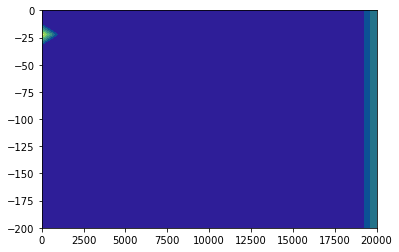

In [21]:
C,S=glacier(20,20,10, 1000)
z = np.linspace(0,200,19)
x = np.linspace(0,20000,19)
X,Z=np.meshgrid(x,z)
plt.contourf(X,-Z,C[0,:,:].T,cmap=cmap)